# Visualization and Analysis for hybrid perovskite single crystal data
    ## Author: Zhi Li
    ## Version 1.1
    ## 03-07-2019

In [1]:
import os, fnmatch
import matplotlib as mpl
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from matplotlib.colors import Normalize
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, cdist, squareform
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import optunity
import optunity.metrics

## What amines we have tried?

In [2]:
file = "PostRunFulldataset_RRP_random only.csv" # data file
df=pd.read_csv(file)
Inchi = pd.read_csv("Organic Inchikey.csv")
Inchidict = dict(zip(Inchi['Chemical Name'], Inchi['InChI Key (ID)']))

Amine_done = []
for i in df['_rxn_organic-inchikey']:
    if i not in Amine_done: 
        Amine_done.append(i)
Amine_number = len(Amine_done)
for i in range(Amine_number):
    Amine_done[i] = dict(zip(Inchi['InChI Key (ID)'],Inchi['Chemical Name']))[Amine_done[i]]
print (Amine_done)

['n-Butylammonium iodide', 'Ethylammonium Iodide', 'Methylammonium iodide', 'Guanidinium iodide', 'Acetamidinium iodide', 'Formamidinium Iodide']


In [3]:
df

RunID_vial  _out_crystalscore  \
0      2018-06-21T21_40_04.434642+00_00_LBL_A1                  1   
1      2018-06-21T21_40_04.434642+00_00_LBL_C1                  1   
2      2018-06-21T21_40_04.434642+00_00_LBL_E1                  1   
3      2018-06-21T21_40_04.434642+00_00_LBL_G1                  1   
4      2018-06-21T21_40_04.434642+00_00_LBL_B1                  1   
5      2018-06-21T21_40_04.434642+00_00_LBL_D1                  1   
6      2018-06-21T21_40_04.434642+00_00_LBL_F1                  1   
7      2018-06-21T21_40_04.434642+00_00_LBL_H1                  1   
8      2018-06-21T21_40_04.434642+00_00_LBL_A2                  1   
9      2018-06-21T21_40_04.434642+00_00_LBL_C2                  1   
10     2018-06-21T21_40_04.434642+00_00_LBL_E2                  1   
11     2018-06-21T21_40_04.434642+00_00_LBL_G2                  1   
12     2018-06-21T21_40_04.434642+00_00_LBL_B2                  1   
13     2018-06-21T21_40_04.434642+00_00_LBL_D2                  1   
14     2018-06-21T21_40_04.434642+00_00_LBL_F2                  1   
15     2018-06-21T21_40_04.434642+00_00_LBL_H2                  1   
16     2018-06-21T21_40_04.434642+00_00_LBL_A3                  1   
17     2018-06-21T21_40_04.434642+00_00_LBL_C3                  1   
18     2018-06-21T21_40_04.434642+00_00_LBL_E3                  1   
19     2018-06-21T21_40_04.434642+00_00_LBL_G3                  1   
20     2018-06-21T21_40_04.434642+00_00_LBL_B3                  1   
21     2018-06-21T21_40_04.434642+00_00_LBL_D3                  1   
22     2018-06-21T21_40_04.434642+00_00_LBL_F3                  1   
23     2018-06-21T21_40_04.434642+00_00_LBL_H3                  1   
24     2018-06-28T22_33_43.276776+00_00_LBL_A1                  1   
25     2018-06-28T22_33_43.276776+00_00_LBL_C1                  1   
26     2018-06-28T22_33_43.276776+00_00_LBL_E1                  1   
27     2018-06-28T22_33_43.276776+00_00_LBL_G1                  1   
28     2018-06-28T22_33_43.276776+00_00_LBL_B1                  1   
29     2018-06-28T22_33_43.276776+00_00_LBL_D1                  1   
...                                        ...                ...   
1898   2018-09-24T17_37_31.739860+00_00_LBL_E9                  2   
1899   2018-09-24T17_37_31.739860+00_00_LBL_G9                  2   
1900   2018-09-24T17_37_31.739860+00_00_LBL_B9                  3   
1901   2018-09-24T17_37_31.739860+00_00_LBL_D9                  4   
1902   2018-09-24T17_37_31.739860+00_00_LBL_F9                  2   
1903   2018-09-24T17_37_31.739860+00_00_LBL_H9                  2   
1904  2018-09-24T17_37_31.739860+00_00_LBL_A10                  3   
1905  2018-09-24T17_37_31.739860+00_00_LBL_C10                  2   
1906  2018-09-24T17_37_31.739860+00_00_LBL_E10                  4   
1907  2018-09-24T17_37_31.739860+00_00_LBL_G10                  4   
1908  2018-09-24T17_37_31.739860+00_00_LBL_B10                  2   
1909  2018-09-24T17_37_31.739860+00_00_LBL_D10                  2   
1910  2018-09-24T17_37_31.739860+00_00_LBL_F10                  4   
1911  2018-09-24T17_37_31.739860+00_00_LBL_H10                  4   
1912  2018-09-24T17_37_31.739860+00_00_LBL_A11                  2   
1913  2018-09-24T17_37_31.739860+00_00_LBL_C11                  2   
1914  2018-09-24T17_37_31.739860+00_00_LBL_E11                  3   
1915  2018-09-24T17_37_31.739860+00_00_LBL_G11                  4   
1916  2018-09-24T17_37_31.739860+00_00_LBL_B11                  4   
1917  2018-09-24T17_37_31.739860+00_00_LBL_D11                  2   
1918  2018-09-24T17_37_31.739860+00_00_LBL_F11                  4   
1919  2018-09-24T17_37_31.739860+00_00_LBL_H11                  4   
1920  2018-09-24T17_37_31.739860+00_00_LBL_A12                  3   
1921  2018-09-24T17_37_31.739860+00_00_LBL_C12                  4   
1922  2018-09-24T17_37_31.739860+00_00_LBL_E12                  2   
1923  2018-09-24T17_37_31.739860+00_00_LBL_G12                  4   
1924  2018-09-24T17_37_31.739860+0

## Function for basic data analysis

In [4]:
# function for specific amine, crystal class
def per3D(points, amine = None, category = None, \
          dim = ['_rxn_M_inorganic', '_rxn_M_organic', '_rxn_M_acid']):
    if amine is not None: amine = Inchidict[amine]
    if amine is None:
        if category is None:
            All_points = np.zeros((points.shape[0], 4))
            for i in range(3):
                All_points[:,i] = points[dim[i]]
            All_points[:,3] = points['_out_crystalscore']
        else:
            All_points = np.zeros((points[points['_out_crystalscore'] == category].shape[0], 4))
            for i in range(3):
                All_points[:,i] = points[dim[i]][points['_out_crystalscore'] == category]
            All_points[:,3] = points['_out_crystalscore'][points['_out_crystalscore'] == category]    
    else:
        if category is None:
            All_points = np.zeros((points[points["_rxn_organic-inchikey"] == amine].shape[0], 4))
            for i in range(3):
                All_points[:,i] = points[dim[i]][points["_rxn_organic-inchikey"] == amine]
            All_points[:,3] = points['_out_crystalscore'][points["_rxn_organic-inchikey"] == amine]
        else:
            All_points = np.zeros((points[points["_rxn_organic-inchikey"] == amine][points['_out_crystalscore'] == category].shape[0], 4))
            for i in range(3):
                All_points[:,i] = points[dim[i]][points["_rxn_organic-inchikey"] == amine][points['_out_crystalscore'] == category]
            All_points[:,3] = points['_out_crystalscore'][points["_rxn_organic-inchikey"] == amine][points['_out_crystalscore'] == category]
    
    return All_points

# Check if point is in convexhull
def point_in_hull(point, hull, tolerance = 1e-12):
    return all((np.dot(equ[:-1],point) + equ[-1] <= tolerance) for equ in hull.equations)

# Generate meshgrid points of certain size and location
def gridgen(n=20,x=3,y=4,z=10, plot = False):
    a = np.linspace(0,x,n)
    b = np.linspace(0,y,n)
    c = np.linspace(0,z,n)
    points = np.zeros((n*n*n,3))
    xv,yv,zv = np.meshgrid(a,b,c)
    if plot: 
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(xv, yv, zv, c = 'coral', s = 5)
    for i in range(n*n*n):
        points[i] = [xv.flatten()[i], yv.flatten()[i], zv.flatten()[i]]
    return points

## Data visualization

### Plot Ethyl data

<IPython.core.display.Javascript object>


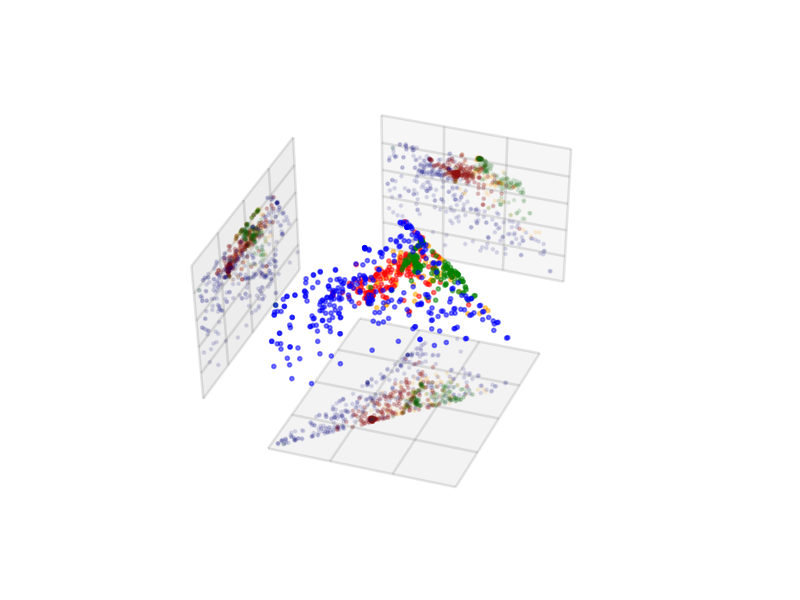

In [5]:
amine_name = "Ethylammonium Iodide" # The ammonium you would like to plot
x_range = [0, 2]
y_range = [0, 5]
z_range = [0, 10.5]
xy_plane = z_range[0] - 3
xz_plane = y_range[1] + 0.1
yz_plane = x_range[0] - 0.5
x_step = 0.5
y_step = 1
z_step = 2

%matplotlib notebook

# 3D plot
point = per3D(df,amine = amine_name,category = None)
color_type = ['blue', 'green','orange','red']
color_type_2D = ['navy', 'darkgreen','orange','darkred']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(1,5):
    s = 5 if i == 4 else 5
    ax.scatter(point[:,0][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               point[:,1][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               point[:,2][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               c = color_type[i-1], s = s, alpha=0.5)



# 2D projections plot
for i in range(1,5):
    s = 3 if i == 4 else 3
    arf = 0.2 if i == 4 else 0.1
    ax.scatter(point[:,0][(point[:,3]==i) & (point[:,0]<x_range[1])],point[:,2][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir = 'y', zs = xz_plane, alpha=arf)
    ax.scatter(point[:,1][(point[:,3]==i) & (point[:,0]<x_range[1])], point[:,2][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir = 'x', zs = yz_plane, alpha=arf)
    ax.scatter(point[:,0][(point[:,3]==i) & (point[:,0]<x_range[1])], point[:,1][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir='z', zs = xy_plane, alpha=arf)

# make 2D planes with meshgrid
yy, zz = np.meshgrid(np.arange(y_range[0],y_range[1], y_step), np.arange(z_range[0],z_range[1],z_step))
xx = np.ones((len(np.arange(z_range[0],z_range[1],z_step)), len(np.arange(y_range[0],y_range[1], y_step))))*yz_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)

xx, yy = np.meshgrid(np.arange(x_range[0],x_range[1], x_step), np.arange(y_range[0],y_range[1], y_step))
zz = np.ones((len(np.arange(y_range[0],y_range[1], y_step)), len(np.arange(x_range[0],x_range[1], x_step))))*xy_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)

xx, zz = np.meshgrid(np.arange(x_range[0],x_range[1], x_step), np.arange(z_range[0],z_range[1],z_step))
yy = np.ones((len(np.arange(z_range[0],z_range[1], z_step)), len(np.arange(x_range[0],x_range[1], x_step))))*xz_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)

ax.set_axis_off()
ax.view_init(elev=45, azim=-70)
ax.set_xlim(yz_plane, x_range[1])
ax.set_ylim(y_range[0],xz_plane)
ax.set_zlim(xy_plane,z_range[1])

plt.savefig('Outcome_plot_'+ amine_name + '_NEW_allrandom.svg', format = "svg", transparent=True)

### Plot nButyl data

In [6]:
amine_name = "n-Butylammonium iodide" # The ammonium you would like to plot
x_range = [0, 3]
y_range = [0, 5]
z_range = [0, 9]
xy_plane = z_range[0] - 2
xz_plane = y_range[1] + 0.1
yz_plane = x_range[0] - 1
x_step = 1
y_step = 1
z_step = 2

%matplotlib notebook

# 3D plot
point = per3D(df,amine = amine_name,category = None)
color_type = ['blue', 'green','orange','red']
color_type_2D = ['navy', 'darkgreen','orange','darkred']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(1,5):
    s = 5 if i == 4 else 5
    ax.scatter(point[:,0][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               point[:,1][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               point[:,2][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               c = color_type[i-1], s = s, alpha=0.5)



# 2D projections plot
for i in range(1,5):
    s = 3 if i == 4 else 3
    arf = 0.2 if i == 4 else 0.1
    ax.scatter(point[:,0][(point[:,3]==i) & (point[:,0]<x_range[1])],point[:,2][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir = 'y', zs = xz_plane, alpha=arf)
    ax.scatter(point[:,1][(point[:,3]==i) & (point[:,0]<x_range[1])], point[:,2][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir = 'x', zs = yz_plane, alpha=arf)
    ax.scatter(point[:,0][(point[:,3]==i) & (point[:,0]<x_range[1])], point[:,1][(point[:,3]==i) & (point[:,0]<x_range[1])], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir='z', zs = xy_plane, alpha=arf)

# make 2D planes with meshgrid and labels
yy, zz = np.meshgrid(np.arange(y_range[0],y_range[1], y_step), np.arange(z_range[0],z_range[1],z_step))
xx = np.ones((len(np.arange(z_range[0],z_range[1],z_step)), len(np.arange(y_range[0],y_range[1], y_step))))*yz_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)

xx, yy = np.meshgrid(np.arange(x_range[0],x_range[1], x_step), np.arange(y_range[0],y_range[1], y_step))
zz = np.ones((len(np.arange(y_range[0],y_range[1], y_step)), len(np.arange(x_range[0],x_range[1], x_step))))*xy_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)

xx, zz = np.meshgrid(np.arange(x_range[0],x_range[1], x_step), np.arange(z_range[0],z_range[1],z_step))
yy = np.ones((len(np.arange(z_range[0],z_range[1], z_step)), len(np.arange(x_range[0],x_range[1], x_step))))*xz_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)

ax.set_axis_off()
ax.view_init(elev=30, azim=-70)
ax.set_xlim(yz_plane, x_range[1])
ax.set_ylim(y_range[0],xz_plane)
ax.set_zlim(xy_plane,z_range[1])

plt.savefig('Outcome_plot_'+ amine_name + '_NEW_allrandom.svg', format = "svg", transparent=True)

<IPython.core.display.Javascript object>

### Plot other amines

In [7]:
print (Amine_done)

['n-Butylammonium iodide', 'Ethylammonium Iodide', 'Methylammonium iodide', 'Guanidinium iodide', 'Acetamidinium iodide', 'Formamidinium Iodide']


In [ ]:
amine_name = "Acetamidinium iodide" # The ammonium you would like to plot
x_range = [0.2, 1.4]
y_range = [0, 3]
z_range = [0, 11]
xy_plane = z_range[0] - 3
xz_plane = y_range[1] + 0.1
yz_plane = x_range[0] - 0.5
x_step = 0.2
y_step = 0.5
z_step = 2

%matplotlib notebook

# 3D plot
point = per3D(df,amine = amine_name,category = None)
color_type = ['blue', 'green','orange','red']
color_type_2D = ['navy', 'darkgreen','orange','darkred']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(1,5):
    s = 5 if i == 4 else 5
    ax.scatter(point[:,0][(point[:,3]==i)], \
               point[:,1][(point[:,3]==i)], \
               point[:,2][(point[:,3]==i)], \
               c = color_type[i-1], s = s, alpha=0.5)



# 2D projections plot
for i in range(1,5):
    s = 5 if i == 4 else 5
    ax.scatter(point[:,0][(point[:,3]==i)], point[:,2][(point[:,3]==i)], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir = 'y', zs = xz_plane, alpha=0.2)
    ax.scatter(point[:,1][(point[:,3]==i)], point[:,2][(point[:,3]==i)], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir = 'x', zs = yz_plane, alpha=0.2)
    ax.scatter(point[:,0][(point[:,3]==i)], point[:,1][(point[:,3]==i)], \
               marker = 'o', c = color_type_2D[i-1], s = s, zdir='z', zs = xy_plane, alpha=0.2)

# make 2D planes with meshgrid and labels
yy, zz = np.meshgrid(np.arange(y_range[0],y_range[1], y_step), np.arange(z_range[0],z_range[1],z_step))
xx = np.ones((len(np.arange(z_range[0],z_range[1],z_step)), len(np.arange(y_range[0],y_range[1], y_step))))*yz_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)

xx, yy = np.meshgrid(np.arange(x_range[0],x_range[1], x_step), np.arange(y_range[0],y_range[1], y_step))
zz = np.ones((len(np.arange(y_range[0],y_range[1], y_step)), len(np.arange(x_range[0],x_range[1], x_step))))*xy_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)

xx, zz = np.meshgrid(np.arange(x_range[0],x_range[1], x_step), np.arange(z_range[0],z_range[1],z_step))
yy = np.ones((len(np.arange(z_range[0],z_range[1], z_step)), len(np.arange(x_range[0],x_range[1], x_step))))*xz_plane
ax.plot_surface(xx,yy,zz, color = "silver", alpha = 0.1)
ax.plot_wireframe(xx,yy,zz, color = "black", alpha = 0.1)

ax.set_axis_off()
ax.set_xlim(yz_plane, x_range[1])
ax.set_ylim(y_range[0],xz_plane)
ax.set_zlim(xy_plane,z_range[1])

plt.savefig('Outcome_plot_'+ amine_name + '_NEW_5.svg', format = "svg", transparent=True)

In [8]:
# Generate meshgrid point
grid_points = gridgen(n=20)

In [9]:
# Calculate convexhull for class4 and total
point_1 = per3D(df,amine = amine_name, category = 1)
point_2 = per3D(df,amine = amine_name, category = 2)
point_3 = per3D(df,amine = amine_name, category = 3)
point_4 = per3D(df,amine = amine_name, category = 4)
point_all = per3D(df,amine = amine_name)

hull_1 = ConvexHull(point_1[:,0:3])
hull_2 = ConvexHull(point_2[:,0:3])
hull_3 = ConvexHull(point_3[:,0:3])
hull_4 = ConvexHull(point_4[:,0:3])
hull_all = ConvexHull(point_all[:,0:3])

vol_percentage = round((hull_4.volume/hull_all.volume)*100,1)
print("volume of class 4 is", hull_4.volume)
print("volume of class 1-4 is", hull_all.volume)
print("volume percentage for " + amine_name + " is " + str(vol_percentage) +" %")

volume of class 4 is 0.2789284660692673
volume of class 1-4 is 8.53028586206664
volume percentage for n-Butylammonium iodide is 3.3 %


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [10]:
# Search and plot meshgrid points in class4 hull and total hull (also find meshgrid point in other hulls)
point_in_box_1 = []
point_in_box_2 = []
point_in_box_3 = []
point_in_box_4 = []
point_in_box_all = []
point_in_box_rest = []

for j in grid_points:
    if point_in_hull(j, hull_all):
        point_in_box_all.append(list(j))
        if point_in_hull(j, hull_4):
            point_in_box_4.append(list(j))
        else: 
            point_in_box_rest.append(list(j))
            if point_in_hull(j, hull_3):
                point_in_box_3.append(list(j))
            elif point_in_hull(j, hull_2):
                point_in_box_2.append(list(j))
            elif point_in_hull(j, hull_1):
                point_in_box_1.append(list(j))

point_in_box_1 = np.array(point_in_box_1)
point_in_box_2 = np.array(point_in_box_2)
point_in_box_3 = np.array(point_in_box_3)
point_in_box_4 = np.array(point_in_box_4)
point_in_box_all = np.array(point_in_box_all)
point_in_box_rest = np.array(point_in_box_rest)

## Plot convexhull + grid points (4 + all)

In [11]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(point_in_box_4[:,0], point_in_box_4[:,1], point_in_box_4[:,2], c = 'orange', alpha = 1, s = 8)
ax.scatter(point_in_box_rest[:,0], point_in_box_rest[:,1], point_in_box_rest[:,2], c = 'blue', alpha = 0.2, s = 5)

n_facet_4 = np.shape(hull_4.simplices)[0]
n_facet_all = np.shape(hull_all.simplices)[0]
facets_4 = np.zeros((n_facet_4,3,3))
facets_all = np.zeros((n_facet_all,3,3))

for i in range(n_facet_4):
    for j in range(3):
        facets_4[i][j] = point_4[hull_4.simplices[i][j],0:3]
        
for i in range(n_facet_all):
    for j in range(3):
        facets_all[i][j] = point_all[hull_all.simplices[i][j],0:3] 

for i in range(n_facet_4):
    x = [facets_4[i][0][0],facets_4[i][1][0],facets_4[i][2][0]]
    y = [facets_4[i][0][1],facets_4[i][1][1],facets_4[i][2][1]]
    z = [facets_4[i][0][2],facets_4[i][1][2],facets_4[i][2][2]]
    verts = [list(zip(x, y, z))]
    ax.add_collection3d(Line3DCollection(verts, colors='red', linewidths=0.5))

for i in range(n_facet_all):
    x = [facets_all[i][0][0],facets_all[i][1][0],facets_all[i][2][0]]
    y = [facets_all[i][0][1],facets_all[i][1][1],facets_all[i][2][1]]
    z = [facets_all[i][0][2],facets_all[i][1][2],facets_all[i][2][2]]
    verts = [list(zip(x, y, z))]
    ax.add_collection3d(Line3DCollection(verts, colors='blue', linewidths=0.3))


ax.set_xlim(0,2.2)
ax.set_ylim(0.2,4)
ax.set_zlim(0,10)
plt.savefig('Grid points.svg', format = 'svg', transparent = True, dpi = 1000)

<IPython.core.display.Javascript object>

In [16]:
## Plot the class 4 convexhull only
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n_facet_4 = np.shape(hull_4.simplices)[0]
n_facet_all = np.shape(hull_all.simplices)[0]
facets_4 = np.zeros((n_facet_4,3,3))
facets_all = np.zeros((n_facet_all,3,3))

for i in range(n_facet_4):
    for j in range(3):
        facets_4[i][j] = point_4[hull_4.simplices[i][j],0:3]

for i in range(n_facet_4):
    x = [facets_4[i][0][0],facets_4[i][1][0],facets_4[i][2][0]]
    y = [facets_4[i][0][1],facets_4[i][1][1],facets_4[i][2][1]]
    z = [facets_4[i][0][2],facets_4[i][1][2],facets_4[i][2][2]]
    verts = [list(zip(x, y, z))]
    ax.add_collection3d(Line3DCollection(verts, colors='red', linewidths=0.5))

ax.set_xlim(0,2.2)
ax.set_ylim(0.2,4)
ax.set_zlim(0,10)
plt.savefig('Class 4 envelop.svg', format = 'svg', transparent = True, dpi = 1000)

<IPython.core.display.Javascript object>

In [12]:
# Building distance matrix (# meshgrid point in class 4 convexhull X # all point)
distance = cdist(point_in_box_4, point_all[:,0:3], 'euclidean') # Calculate the distance between meshgrid point and all class in class 4 convexhull
distance_class_ = np.concatenate((distance, [point_all[:,3]]), axis = 0) # Add the last row as class of all points

In [13]:
k = 5 # number of neighbor is considering
threshold = 2 # dont't know how to use this yet

# Finding the k-nearest neighbors for meshgrid point
vote_list = []
for i in range(np.shape(point_in_box_4)[0]):
    lst = np.zeros((np.shape(point_all)[0],2))
    lst[:,0] = distance[i]
    lst[:,1] = point_all[:,3]
    lst = list(lst)
    lst.sort(key=lambda tup: tup[0])
    lst = np.array(lst[:k])
    if all(list(lst[:,1]).count(4) >= list(lst[:,1]).count(j) for j in [1,2,3]):
        vote_list.append(4) # if vote is 4
    else:
        vote_list.append(0) # if vote is other than 4, set as "0"

point_in_box_4_vote = np.zeros((np.shape(point_in_box_4)[0],4))
point_in_box_4_vote[:,0:3] = point_in_box_4 # coordiation of point in class 4 convexhull
point_in_box_4_vote[:,3] = vote_list # vote of point in class 4 convexhull

In [14]:
# "Fill Factor" (predicted class 4 over all) and "Fuzzy Edege Factor" (predicted non-class 4 over all) calculation.
class4_num = 0
class123_num = 0
for i in point_in_box_4_vote:
    if i[3] == 4:
        class4_num += 1
    else:
        class123_num += 1
FF = round(class4_num/(np.shape(point_in_box_4)[0]),2)
FEF = round(class123_num/(np.shape(point_in_box_4)[0]),2)
print("Fill factor is ", FF)
print("Fuzzy edge factor is ", FEF)

Fill factor is  0.06
Fuzzy edge factor is  0.94


<IPython.core.display.Javascript object>


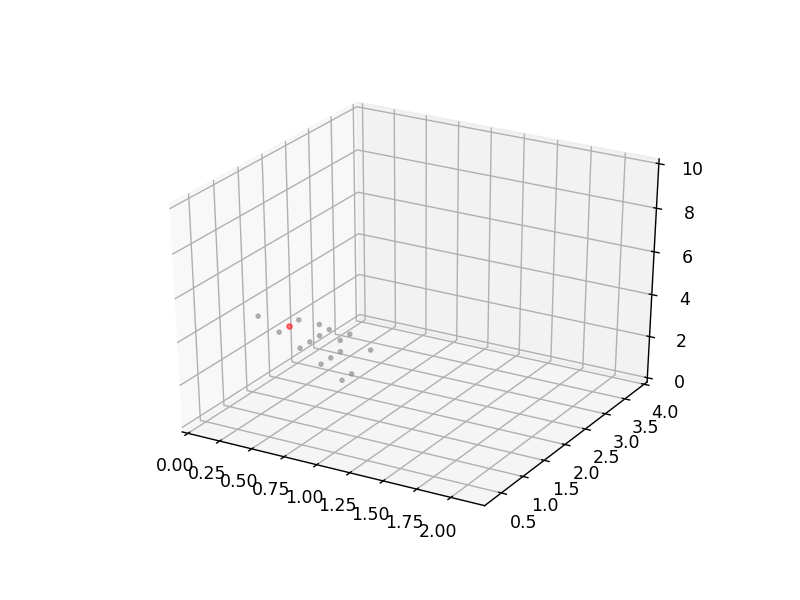

In [15]:
# Plot real class 4 and fake class 4
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(point_in_box_4_vote[:,0][point_in_box_4_vote[:,3] == 4], \
                 point_in_box_4_vote[:,1][point_in_box_4_vote[:,3] == 4], \
                 point_in_box_4_vote[:,2][point_in_box_4_vote[:,3] == 4], \
                 c = "red", s = 8, alpha = 0.5)
img = ax.scatter(point_in_box_4_vote[:,0][point_in_box_4_vote[:,3] == 0], \
                 point_in_box_4_vote[:,1][point_in_box_4_vote[:,3] == 0], \
                 point_in_box_4_vote[:,2][point_in_box_4_vote[:,3] == 0], \
                 c = "gray", s = 5, alpha = 0.5)
ax.set_xlim(0,2.2)
ax.set_ylim(0.2,4)
ax.set_zlim(0,10)
# fig.colorbar(img)
plt.savefig('patriots and traitors_'+ amine_name + '.svg', format = "svg", transparent=True, dpi = 1000)